<a href="https://colab.research.google.com/github/luisespriella9/Deep-Learning-Advanced-Computer-Vision/blob/master/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, Dropout
from keras import Sequential

Using TensorFlow backend.


Load Fashion MNIST Data

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("x train shape: ", x_train.shape)
print("y train shape: ", y_train.shape)
print("x test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)

x train shape:  (60000, 28, 28)
y train shape:  (60000,)
x test shape:  (10000, 28, 28)
y test shape:  (10000,)


Reshape and Normalize Data

In [0]:
x_train = np.reshape(x_train, (60000, 28, 28, 1))/255
x_test = np.reshape(x_test, (10000, 28, 28, 1))/255

In [5]:
print("x train shape: ", x_train.shape)
print("x test shape: ", x_test.shape)

x train shape:  (60000, 28, 28, 1)
x test shape:  (10000, 28, 28, 1)


In [6]:
print("x train sample shape: ", x_train[0].shape)

x train sample shape:  (28, 28, 1)


In [7]:
num_classes = len(np.unique(y_train))
num_classes

10

convert class vectors to binary class matrices

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Create CNN Keras

In [0]:
def build_cnn(input_shape, num_classes, optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']):
  classifier = Sequential()

  # first convolution
  classifier.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape= input_shape, activation='relu', padding='same'))
  classifier.add(BatchNormalization())
  classifier.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
  classifier.add(BatchNormalization())
  classifier.add(MaxPooling2D(pool_size=(2, 2)))

  # second convolution
  classifier.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
  classifier.add(BatchNormalization())
  classifier.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
  classifier.add(BatchNormalization())
  classifier.add(MaxPooling2D(pool_size=(2, 2)))

  # third convolution
  classifier.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
  classifier.add(BatchNormalization())
  classifier.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
  classifier.add(BatchNormalization())
  classifier.add(MaxPooling2D(pool_size=(2, 2)))

  # flatten layer
  classifier.add(Flatten())

  # Full connection
  classifier.add(Dense(units = 80, activation = 'relu'))
  classifier.add(Dropout(rate=0.4))
  classifier.add(Dense(units=num_classes, activation='softmax'))

  classifier.compile(optimizer=optimizer, loss=loss, metrics=metrics)
  return classifier

Train CNN

In [10]:
classifier = build_cnn(input_shape=x_train[0].shape, num_classes=num_classes)
history = classifier.fit(x=x_train, y=y_train, batch_size=32, epochs=5, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 22s 520us/step - loss: 0.6132 - accuracy: 0.7799 - val_loss: 0.3459 - val_accuracy: 0.8688
Epoch 2/5
42000/42000 [==============================] - 19s 457us/step - loss: 0.4005 - accuracy: 0.8597 - val_loss: 0.3030 - val_accuracy: 0.8936
Epoch 3/5
42000/42000 [==============================] - 19s 460us/step - loss: 0.3342 - accuracy: 0.8837 - val_loss: 0.2725 - val_accuracy: 0.9103
Epoch 4/5
42000/42000 [==============================] - 20s 468us/step - loss: 0.2821 - accuracy: 0.8999 - val_loss: 0.2684 - val_accuracy: 0.9048
Epoch 5/5
42000/42000 [==============================] - 19s 460us/step - loss: 0.2511 - accuracy: 0.9126 - val_loss: 0.2357 - val_accuracy: 0.9171


In [11]:
history.history

{'accuracy': [0.77992857, 0.8596905, 0.8837381, 0.8999048, 0.91257143],
 'loss': [0.6131530896822611,
  0.40045124406473975,
  0.3342170701339131,
  0.2821255776740256,
  0.25105416998551006],
 'val_accuracy': [0.8687777519226074,
  0.8935555815696716,
  0.9103333353996277,
  0.9048333168029785,
  0.9171110987663269],
 'val_loss': [0.3458537438842985,
  0.3029531278014183,
  0.2725238166550795,
  0.26836946143044366,
  0.23573489825924238]}

Plot Loss

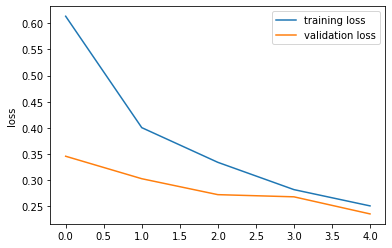

In [12]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.ylabel('loss')
plt.legend()
plt.show()

Plot Accuracy

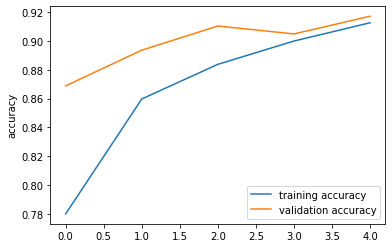

In [13]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.ylabel('accuracy')
plt.legend()
plt.show()